# Tutoriel MID Générique
<u>Objectif</u> : Illustrer les propriétés de la MID.

Concrètement, nous considérons un système qui a un controle par une loi de commande retardée (expression mathématique) et l'on prend compte et tirons avantage de ce retard dans le calcul des gains de la loi de commande retardée pour stabiliser le système.

<u> Informations importantes </u> :

- Stabilité : Lorsque l'on a l'équation décrivant un système dans l'espace de Laplace (transformée de Laplace), la stabilité est traduite par l'ensemble des racines (complexes) de l'équation ayant leurs parties réelles négatives. On dit que les racines sont à gauche (de l'axe des ordonnées).
- Transformée de Laplace (juste pour info) : Dans notre cas, la partie la plus importante dans la transformée de Laplace est la dérivation, c'est ce qui nous permet de passer d'une équation différentielle à une équation polynomiale. L'idée très grossière est qu'une dérivée d'ordre $n$ dans l'espace "classique"/"temporel" correspond à une multiplication par un terme $s^n$ dans l'espace de Laplace (fréquentiel). Donc, par exemple, $4\times k \times y''(t)\rightarrow 4ks^2y(s)$

On traite une équation différentielle du type :
$$
\frac{d^n y(t)}{dt^n} + \sum\limits_{i=0}^{n-1}a_i\frac{d^i y(t)}{dt^i} + \sum\limits_{j=0}^m \alpha_j\frac{d^j y(t-\tau)}{dt^j}=0
$$

- $n, m\in\mathbb{N}, n>m$
- $a_i, \alpha_j \in \mathbb{R}$
- $s\in\mathbb{C}$,
- $\tau \in \mathbb{R}$

Par une transformée de Laplace :
$$
Q(s) = s^n+a_{n-1}s^{n-1}+...+a_0 + \left[\alpha_ms^m+...+\alpha_0\right]e^{-s\tau}
$$

Cette équation est polynomiale et non différentielle ce qui la rend beaucoup plus simple à traiter.

On souhaite réaliser ce que l'on appelle un placement de pôle. Cela signifie dans ce cas que l'on veut trouver les coefficients ($a_i$ et $\alpha_j$ parfois notés $b_j$) soient de telle sorte que $Q(s_0)=0$. 

On connaît donc une valeur de racine à "forcer" pour le quasipolynôme en jouant sur les coefficients.

Le code suivant a été développé sur la base du pseudo-code de la MID Générique, décrit par Franck, que vous trouverez à la fin du document. Puis adapté en version interactive par les équipes de P3Dweb.


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))
%matplotlib notebook
import numpy as np
import sympy as sp
import cxroots as cx
import matplotlib.pyplot as plt
import ipywidgets as widgets


def MID_function(n,s0,value_tau):
    
    m = 1
    
    s = sp.symbols('s')  # define variable s for our problem to be solved
    tau = sp.symbols('tau')  # define variable tau : delay
    
    a = sp.symbols(["a{:d}".format(i) for i in range(n)], real=True)
    alpha = sp.symbols(["alpha{:d}".format(i) for i in range(m + 1)], real=True)
    
    
    Polynomial = s**n + np.array(a).dot([s**i for i in range(n)]) # Revient à faire s^n + a_{n-1}^{n-1}...
    Delayed = np.array(alpha).dot([s**i for i in range(m+1)])*sp.exp(-s*tau) # Revient à faire 
    Q = Polynomial + Delayed 

    SysDerivatif = [Q]
    for i in range(n+m+1):
        DerniereDerivee = SysDerivatif[-1]
        SysDerivatif.append(DerniereDerivee.diff(s)) # Dérivée par rapport à s
    
    sol = sp.linsolve(SysDerivatif[:-1], alpha + a).args[0] # Solveur selon les alpha et les a

    solNum = sol.subs({s : s0})
    solNum = solNum.subs({tau : value_tau})
    
    a_num = list(solNum[m + 1:])
    alpha_num = list(solNum[:m + 1])
    
    QNumerique = s**n + np.array(a_num).dot([s**i for i in range(n)])+\
    np.array(alpha_num).dot([s**i for i in range(m+1)])*sp.exp(-s*tau)
    QNumerique = QNumerique.subs(tau, value_tau)
    
    sysRootFinding = [QNumerique, QNumerique.diff(s)]
    sysFunc = [sp.lambdify(s, i) for i in sysRootFinding]
    rect = cx.Rectangle([-100, 10], [-100, 100])
    roots = rect.roots(sysFunc[0], sysFunc[1], rootErrTol=1e-5, absTol=1e-5, M = n + m + 1)
    xroot = np.real(roots[0])
    yroot = np.imag(roots[0])

    return xroot,yroot

<IPython.core.display.Javascript object>


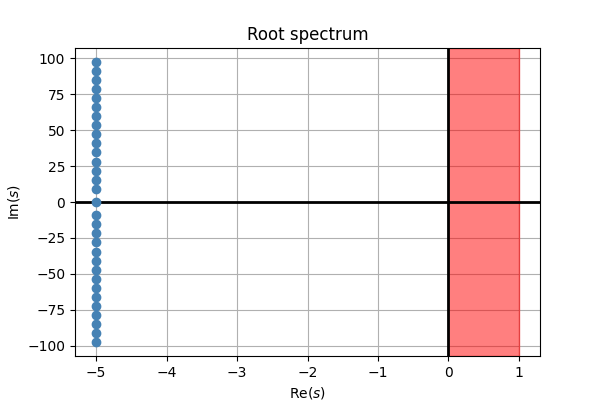

interactive(children=(IntSlider(value=2, description='n', max=3), FloatSlider(value=-5.0, description='s0', ma…

In [37]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Root spectrum")
ax.set_xlabel(r"Re$(s)$")
ax.set_ylabel(r"Im$(s)$")
ax.axhline(linewidth=2, color='black', zorder = 2)
ax.axvline(linewidth=2, color='black', zorder = 2)
ax.axvspan(0, 1, alpha=0.5, color='red', zorder = 2)
ax.grid()
line, = ax.plot([], [], 'o', color='steelblue', zorder = 3)

@widgets.interact(n=(0, 3, 1), s0=(-6, -4, 0.1), value_tau=(1, 2, 0.1))

def update(n = 2, s0 = -5, value_tau = 1):
    xr,yr = MID_function(n,s0,value_tau)
    line.set_data(xr, yr)
    ax.relim()
    ax.autoscale_view()
    fig.canvas.draw()

In [14]:
@widgets.interact(n=(0, 3, 1),s0=(-6, -4, 0.1),value_tau=(1, 2, 0.1))

def update(n = 2, s0 = -5, value_tau = 1):

    xr,yr = MID_function(n,s0,value_tau)
    
    fig, ax = plt.subplots(figsize=(6, 4))
    plt.title("Root spectrum")
    plt.xlabel(r"$Re(s)$")
    plt.ylabel(r"$Im(s)$")
    ax.axhline(linewidth=2, color='black', zorder = 2)
    ax.axvline(linewidth=2, color='black', zorder = 2)
    ax.axvspan(0, 1, alpha=0.5, color='red', zorder = 2)
    ax.grid()
    ax.scatter(xr, yr,color='steelblue', zorder = 3)


interactive(children=(IntSlider(value=2, description='n', max=3), FloatSlider(value=-5.0, description='s0', ma…